# ***FakeMind-ML4VA Project: Detecting Droughts in Virginia***

Team FakeMind is composed of three UVA students: Alex Fetea, Kamil Urbanowski, and Tyler Kim. FakeMind's goal is to predict droughts in Virginia using a dataset found online. This will help farmers take better care of their farms by taking preparing ahead of time for possible droughts.

The link to the datasets can be found below:

https://resilience.climate.gov/datasets/esri2::us-drought-by-state/explore

https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily


In general, this notebook will store our code for the ML4VA project. This notebook will also be divided into 8 Steps:

1. Big Picture & Setup
2. Getting the Data
3. Discovering and Visualizing the Data
4. Data Cleaning
5. Selecting and Training the Models
6. Fine Tuning the Model
7. Presentation
8. Launch


## **1-Big Picture & Setup**

In [119]:
# import the necessary libraries
import sklearn
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

np.random.seed(17)

## **2-Getting the Data**

In [120]:
# loads the data and includes some information and statistics about the dataset
def load_data(filepath):
  data = pd.read_csv(filepath)

  file_size = 7.1
  num_entries = 62313
  num_features = 15
  num_categorical = 2
  missing_value_exists = True

  # print the output
  print("File Size:", str(file_size) + "+ MB")
  print("Number of Entries:", str(num_entries))
  print("Number of Features:", str(num_features))
  print("Do Categorical variables exist:", "Yes" if num_categorical > 0 else "No", "(" + str(num_categorical) + ")")
  print("Do missing values exist:", "Yes" if missing_value_exists else "No")
  print("\n")

  print(data.info())
  print(data.describe())

  return data

In [121]:
# loads the data
drought_data = load_data("./USA_Drought_Intensity_2000_-_Present.csv")

File Size: 7.1+ MB
Number of Entries: 62313
Number of Features: 15
Do Categorical variables exist: Yes (2)
Do missing values exist: Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62313 entries, 0 to 62312
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    62313 non-null  int64  
 1   period      62313 non-null  int64  
 2   state_abbr  62313 non-null  object 
 3   admin_fips  62313 non-null  int64  
 4   ddate       62313 non-null  object 
 5   nothing     62272 non-null  float64
 6   d0          62270 non-null  float64
 7   d1          62292 non-null  float64
 8   d2          62299 non-null  float64
 9   d3          62302 non-null  float64
 10  d4          62309 non-null  float64
 11  D0_D4       62272 non-null  float64
 12  D1_D4       62294 non-null  float64
 13  D2_D4       62300 non-null  float64
 14  D3_D4       62302 non-null  float64
dtypes: float64(10), int64(3), object(2)
memory usage: 7

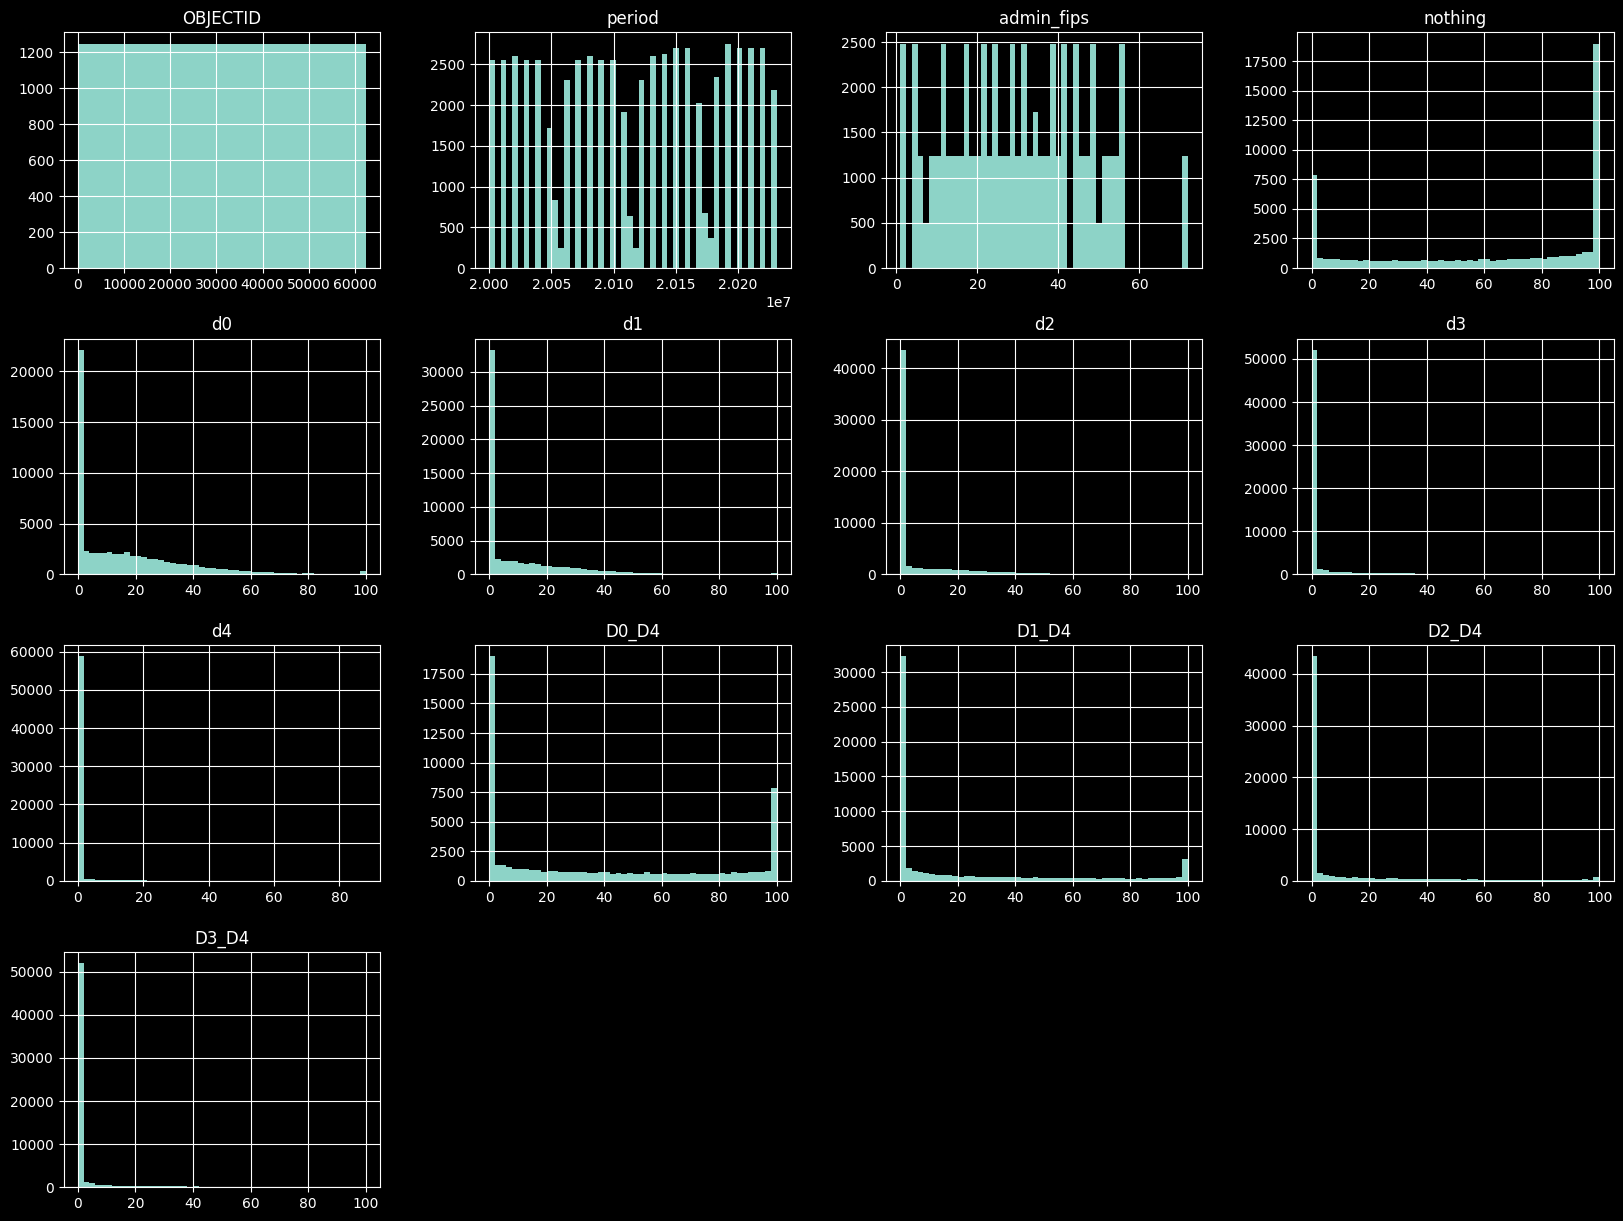

In [122]:
%matplotlib inline
drought_data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [123]:
# stratified test distribution by state abbreviation
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 17)
for train_index, test_index in split.split(drought_data, drought_data['state_abbr']):
  strat_train_set = drought_data.loc[train_index]
  strat_test_set = drought_data.loc[test_index]

In [124]:
# test distributions
strat_test_set["state_abbr"].value_counts() / len(strat_test_set)

NV    0.019979
AL    0.019979
SC    0.019979
ME    0.019979
RI    0.019979
MN    0.019979
AZ    0.019979
DC    0.019979
HI    0.019979
WA    0.019979
GA    0.019979
WY    0.019979
DE    0.019979
LA    0.019979
WV    0.019979
OH    0.019979
CA    0.019979
OK    0.019979
ND    0.019979
MT    0.019979
TX    0.019899
UT    0.019899
VA    0.019899
CT    0.019899
IL    0.019899
MD    0.019899
KS    0.019899
NH    0.019899
MS    0.019899
TN    0.019899
ID    0.019899
OR    0.019899
MA    0.019899
NY    0.019899
MO    0.019899
WI    0.019899
NE    0.019899
SD    0.019899
NJ    0.019899
FL    0.019899
IA    0.019899
PA    0.019899
IN    0.019899
MI    0.019899
AK    0.019899
KY    0.019899
PR    0.019899
AR    0.019899
NC    0.019899
VT    0.007783
CO    0.007783
NM    0.007783
Name: state_abbr, dtype: float64

In [125]:
drought_data["state_abbr"].value_counts() / len(drought_data)

AK    0.019932
PR    0.019932
ND    0.019932
NE    0.019932
NH    0.019932
NJ    0.019932
NV    0.019932
NY    0.019932
OH    0.019932
OK    0.019932
OR    0.019932
PA    0.019932
RI    0.019932
MT    0.019932
SC    0.019932
SD    0.019932
TN    0.019932
TX    0.019932
UT    0.019932
VA    0.019932
WA    0.019932
WI    0.019932
WV    0.019932
WY    0.019932
AL    0.019932
NC    0.019932
MS    0.019932
ID    0.019932
AR    0.019932
AZ    0.019932
CA    0.019932
CT    0.019932
DC    0.019932
DE    0.019932
FL    0.019932
GA    0.019932
HI    0.019932
MO    0.019932
IA    0.019932
IL    0.019932
IN    0.019932
KS    0.019932
KY    0.019932
LA    0.019932
MA    0.019932
MD    0.019932
ME    0.019932
MI    0.019932
MN    0.019932
CO    0.007783
NM    0.007783
VT    0.007783
Name: state_abbr, dtype: float64

## **3-Discovering and Visualizing the Data**

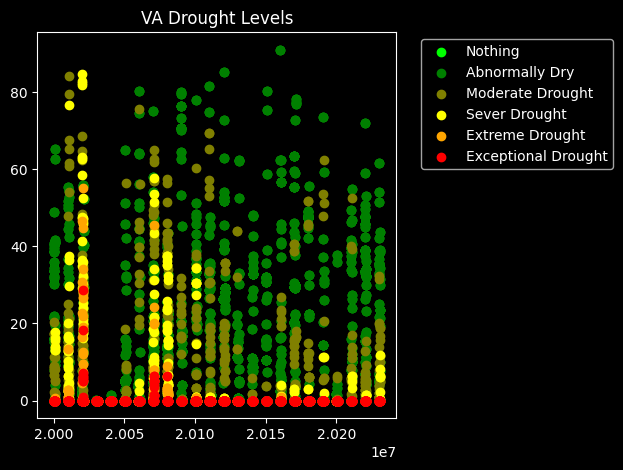

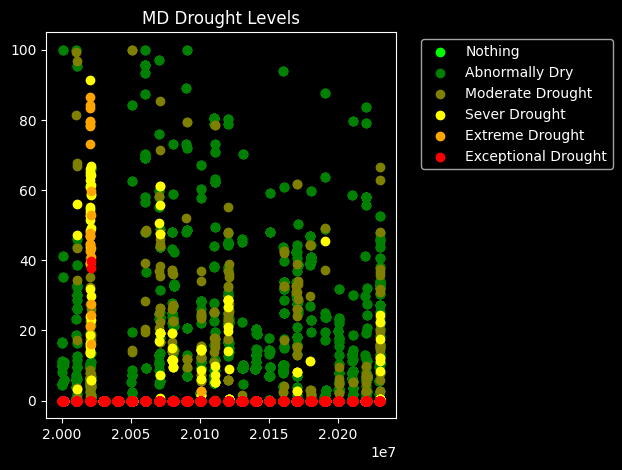

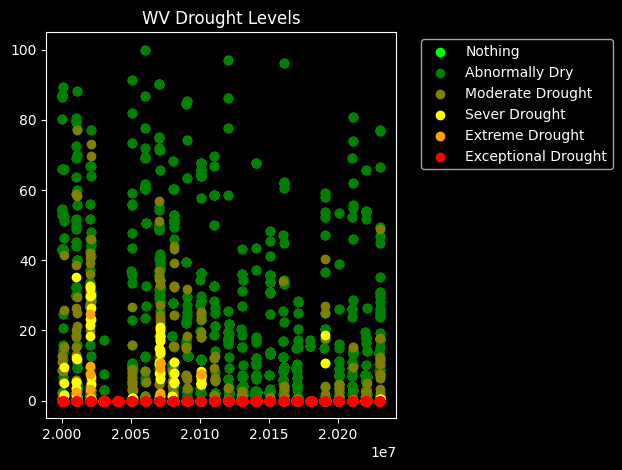

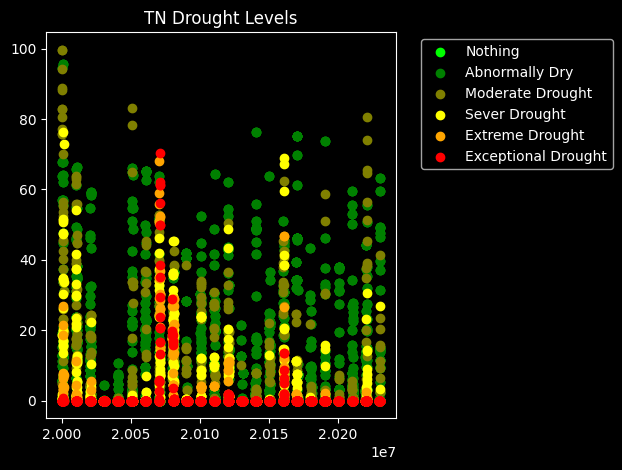

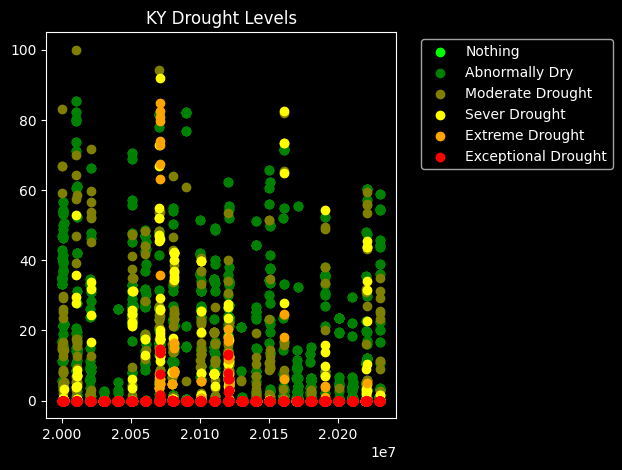

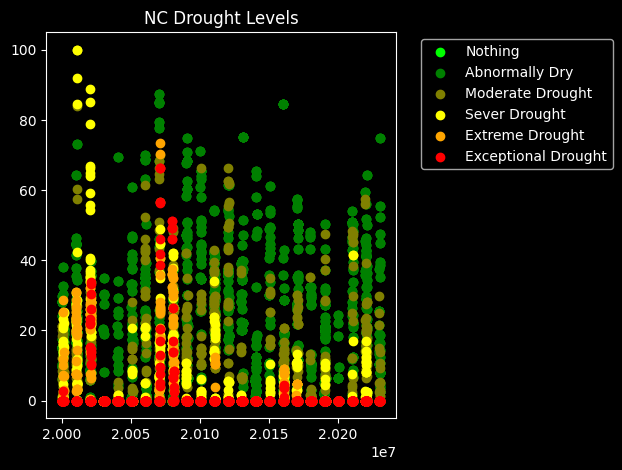

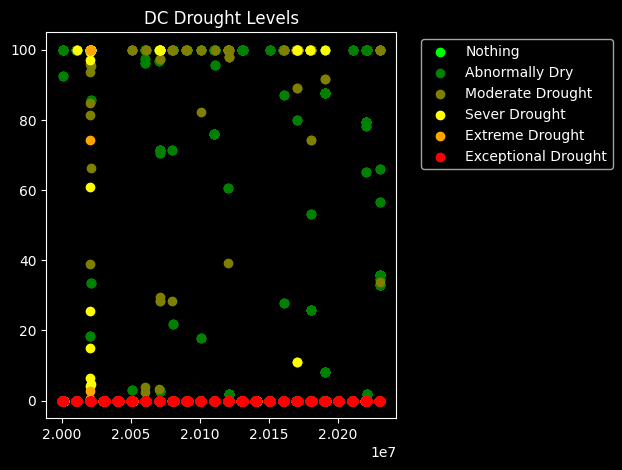

In [126]:
import seaborn as sns

plt.style.use("dark_background")

states_of_interest = ["VA", "MD", "WV", "TN", "KY", "NC", "DC"]

for state in states_of_interest:
  sub_df_train = strat_train_set.loc[strat_train_set["state_abbr"] == state]
  plt.title(state + " Drought Levels")

  plt.scatter(sub_df_train["period"], sub_df_train["d0"], color = "lime", label = "Nothing")
  plt.scatter(sub_df_train["period"], sub_df_train["d0"], color = "green", label = "Abnormally Dry")
  plt.scatter(sub_df_train["period"], sub_df_train["d1"], color = "olive", label = "Moderate Drought")
  plt.scatter(sub_df_train["period"], sub_df_train["d2"], color = "yellow", label = "Sever Drought")
  plt.scatter(sub_df_train["period"], sub_df_train["d3"], color = "orange", label = "Extreme Drought")
  plt.scatter(sub_df_train["period"], sub_df_train["d4"], color = "red", label = "Exceptional Drought")
  plt.legend(bbox_to_anchor = (1.05, 1.0), loc = "upper left")
  plt.tight_layout()
  plt.show()


The scatterplots above represent the level of drought for VA and other adjacent states. It seems as if many of the states have a tendency to be abnormally dry but rarely have anything worse.

## **4-Data Cleaning**

Will drop some features since some of it is redundant.

In [127]:
# drop features
drop_list = ["D1_D4", "D2_D4", "D3_D4", "OBJECTID", "state_abbr", "admin_fips", "nothing", "d0", "d1", "d2", "d3", "d4", "D0_D4"]
drought_data = drought_data.drop(drop_list, axis = 1)

print(drought_data.head())

     period                   ddate
0  20140701  2014/07/01 00:00:00+00
1  20140624  2014/06/24 00:00:00+00
2  20140617  2014/06/17 00:00:00+00
3  20140610  2014/06/10 00:00:00+00
4  20140603  2014/06/03 00:00:00+00


In [128]:
output_list = ["nothing", "d0", "d1", "d2", "d3", "d4", "D0_D4"]

y_strat_train_set = strat_train_set[output_list]
X_strat_train_set = strat_train_set.drop(drop_list, axis = 1)

print(y_strat_train_set.head())
print(X_strat_train_set.head())


       nothing     d0    d1     d2     d3   d4   D0_D4
10490   100.00   0.00  0.00   0.00   0.00  0.0    0.00
6505     77.95  22.05  0.00   0.00   0.00  0.0   22.05
2076    100.00   0.00  0.00   0.00   0.00  0.0    0.00
22279   100.00   0.00  0.00   0.00   0.00  0.0    0.00
7547      0.00   0.00  8.95  46.21  44.84  0.0  100.00
         period                   ddate
10490  20020122  2002/01/22 00:00:00+00
6505   20051122  2005/11/22 00:00:00+00
2076   20030923  2003/09/23 00:00:00+00
22279  20080401  2008/04/01 00:00:00+00
7547   20000606  2000/06/06 00:00:00+00


In [129]:
from matplotlib.patches import SimpleNamespace
# numeric
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(drought_data.select_dtypes(include = np.number))
cat_attribs = list(drought_data.select_dtypes(exclude = np.number))

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 0)),
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [130]:
drought_train_data_prepared = full_pipeline.fit_transform(X_strat_train_set)
print(drought_train_data_prepared.shape)

(49850, 1242)


## **5-Selecting and Training the Models**

In [155]:
import tensorflow as tf
from tensorflow import keras

# rnn model
def build_rnn_model(n_hidden = 1, n_neurons = [20, 20], input_shape = [None, 1]):
  model = keras.models.Sequential()
  model.add(keras.layers.SimpleRNN(units = n_neurons[0], return_sequences = True, input_shape = input_shape))

  n_neurons_idx = 1
  n_neurons_length = len(n_neurons)

  for layer in range(n_hidden):
    model.add(keras.layers.SimpleRNN(units = n_neurons[n_neurons_idx], return_sequences = True))
    n_neurons_idx = (n_neurons_idx + 1) % n_neurons_length

  model.add(keras.layers.Dense(5, activation = "softmax"))
  model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
  return model

m, n = drought_train_data_prepared.shape
rnn_model = build_rnn_model(n_hidden = 1, n_neurons = [20, 20], input_shape = [None, n])

In [156]:
rnn_model.fit(drought_train_data_prepared, epochs = 10)

Epoch 1/10


ValueError: ignored

## **6-Fine Tuning the Model**

## **7-Presentation**

## **8-Launch**